In [1]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)


Toggle code

In [2]:
# all modules necessary for this nb
import os
import sys
import pickle

import numpy as np
np.random.seed(0)
import pylab as pl
import scipy.stats as sstats

# setting parameters for default matplotlib plots
%matplotlib inline

In [3]:
pl.style.use('fabiostyle')
# pl.rcParams['savefig.dpi'] = 300 # dpi for most publications
# pl.rcParams['xtick.labelsize'] = 7
# pl.rcParams['ytick.labelsize'] = 7
# pl.rcParams['axes.labelsize'] = 7
# pl.rcParams['axes.titlesize'] = 5
# pl.rcParams['legend.fontsize'] = 5
# pl.rcParams['xtick.labelsize'] = 5
# pl.rcParams['ytick.labelsize'] = 5
# pl.rcParams['font.size'] = 7

# needs to find the library of functions
sys.path.append('../../code/')  # to be replaced!

import utils as ut
import plots as pt

In [4]:
NOTEBOOK_NAME = 'mds_05sec'

In [5]:
from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
load_workspace(ip, db)

# use `save_worspace(db)` to save variables at the end

In [6]:
from itertools import product
def load_all_animals_vars(varname, animal_list, pilot_list=None, notebook='preprocessing'):
    all_of_them = {}
    for ani in animal_list:
        folder = '../%s/notebooks/autorestore/%s/' % (ani, notebook)
        all_of_them.update({ani: ut.load_variable(varname, folder)})
    return all_of_them

In [7]:
sessions = 'pre','post'

In [8]:
pre_animals  = 'c3m1', 'c3m2', 'c3f3','c10m8'
post_animals = '90','90_475','91','93_500','93_580','93_720','93_810','c3m1', 'c3m2', 'c3f3', 'c10m8'

In [9]:
##find animals common to both sessions
#prepost_animals = np.intersect1d(pre_animals, post_animals)

In [13]:
for sess in sessions:

    exec("patterns_tb_%s = dict(zip(%s_animals, [ut.load_variable('patterns_tb',\
                                                           '../%%s/%s/notebooks/autorestore/decoding_around_onset_0.5sec/'%%ani)\
                                                  for ani in %s_animals]))"%(sess, sess, sess, sess))
    exec("labels_%s = dict(zip(%s_animals, [ut.load_variable('labels',\
                                                         '../%%s/%s/notebooks/autorestore/decoding_around_onset_0.5sec/'%%ani)\
                                                  for ani in %s_animals]))"%(sess, sess, sess, sess))

In [14]:
#prepost_patterns_CS_pre = load_all_animals_vars('patterns_CS_evs_pre_post_1s', prepost_animals, '', notebook='decoding_all')             
#prepost_patterns_CS_post = load_all_animals_vars('patterns_CS_evs_post_pre_1s', prepost_animals, '', notebook='decoding_all')
#prepost_patterns_pre = load_all_animals_vars('patterns_evs_pre_post_1s', prepost_animals, '', notebook='decoding_all')             
#prepost_patterns_post = load_all_animals_vars('patterns_evs_post_pre_1s', prepost_animals, '', notebook='decoding_all')
#prepost_labels_pre = load_all_animals_vars('labels_pre',prepost_animals, '', notebook='decoding_all')
#prepost_labels_post = load_all_animals_vars('labels_post',prepost_animals, '', notebook='decoding_all')

In [15]:
from sklearn.manifold import MDS
mds = MDS()

In [16]:
#def plot_linear_decoder(ax, patterns, labels_comb, decoder, **args):
#    
#    xmin, xmax, _, _ = ax.axis()
#    decoder.fit(patterns, labels_comb)
#    x = np.r_[np.min(patterns), np.max(patterns)]
#    a = decoder.coef_[0]
#    b = decoder.coef0
#    ax.plot([xmin, xmax], [-(a[0]*xmin-b)/a[1], -(a[0]*xmax-b)/a[1]], **args)

In [17]:
from sklearn.svm import SVC

In [18]:
def plot_mds(ax, postrenew_patterns_all_mds, labels_comb, with_background=False, with_decoders=True, decoder=None,
             symbol1='o', symbol2='^', mec1='r',mec2='b', color1 = 'k',color2='.9'):

    x = postrenew_patterns_all_mds[:, 0]
    y = postrenew_patterns_all_mds[:, 1]

    n_pre = postrenew_patterns_all_mds.shape[0]/2
    pre_mx = [x[:n_pre][labels_comb==0].mean()]
    pre_px = [x[:n_pre][labels_comb==1].mean()]
    post_mx = [x[n_pre:][labels_comb==0].mean()]
    post_px = [x[n_pre:][labels_comb==1].mean()]
    pre_my = [y[:n_pre][labels_comb==0].mean()]
    pre_py = [y[:n_pre][labels_comb==1].mean()]
    post_my = [y[n_pre:][labels_comb==0].mean()]
    post_py = [y[n_pre:][labels_comb==1].mean()]

    ax.plot(pre_px, pre_py, symbol1, mew=1, ms=5, zorder=19, mec=mec1, color=color1)
    ax.plot(pre_mx, pre_my, symbol1, mew=1, ms=5, zorder=19, mec=mec1, color=color2)

    ax.plot(post_px, post_py, symbol2, mew=1, ms=5, zorder=19, mec=mec2, color=color1)
    ax.plot(post_mx, post_my, symbol2, mew=1, ms=5, zorder=19, mec=mec2, color=color2)

    if with_background:
        ax.plot(x[:n_pre][labels_comb==0], y[:n_pre][labels_comb==0],
                symbol1, mew=0, ms=2, alpha=0.3, color='0.7')
        ax.plot(x[:n_pre][labels_comb==1], y[:n_pre][labels_comb==1],
                symbol1, mew=0, ms=2, alpha=0.3, color='r')

        ax.plot(x[n_pre:][labels_comb==0], y[n_pre:][labels_comb==0],
                symbol2, mew=0, ms=2, alpha=0.3, color='0.7')
        ax.plot(x[n_pre:][labels_comb==1], y[n_pre:][labels_comb==1],
                symbol2, mew=0, ms=2, alpha=0.3, color='r')
    lim = 4
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)
    if with_decoders:
        if decoder is None:
            decoder = SVC(kernel='linear', decision_function_shape='ovo')
        plot_linear_decoder(ax, postrenew_patterns_all_mds[:n_pre], labels_comb, decoder,
                    linestyle='dashed', color='r')
        plot_linear_decoder(ax, postrenew_patterns_all_mds[n_pre:], labels_comb, decoder,
                    linestyle='solid', color='y')
        
    ax.set_xticks(())
    ax.set_yticks(())

In [19]:
import time

In [28]:
print patterns_tb_post['90'].shape
print patterns_tb_post['c3f3'].shape

(28, 120, 25)
(26, 120, 146)


In [26]:
#delta_t0 = 0.5
#
#t_start0 = -4  # sec
#t_stop0 = 10  # sec
#
######## Pre animals only went from -4 to 9, so will only take until 9s post CS onset ###############33

In [29]:
for sess in sessions:
    for t in range(26):
        exec('patterns_tb_%s_%s = {}'%(t, sess))
        for ani in eval('%s_animals'%sess):
            try:
                print sess,
                print ani,
                exec("patterns_tb_%s_%s['%s'] = patterns_tb_%s['%s'][%s]"%(t,sess,ani,sess,ani,t))
            except IOError as error:
                print error
            continue

pre c3m1 pre c3m2 pre c3f3 pre c10m8 pre c3m1 pre c3m2 pre c3f3 pre c10m8 pre c3m1 pre c3m2 pre c3f3 pre c10m8 pre c3m1 pre c3m2 pre c3f3 pre c10m8 pre c3m1 pre c3m2 pre c3f3 pre c10m8 pre c3m1 pre c3m2 pre c3f3 pre c10m8 pre c3m1 pre c3m2 pre c3f3 pre c10m8 pre c3m1 pre c3m2 pre c3f3 pre c10m8 pre c3m1 pre c3m2 pre c3f3 pre c10m8 pre c3m1 pre c3m2 pre c3f3 pre c10m8 pre c3m1 pre c3m2 pre c3f3 pre c10m8 pre c3m1 pre c3m2 pre c3f3 pre c10m8 pre c3m1 pre c3m2 pre c3f3 pre c10m8 pre c3m1 pre c3m2 pre c3f3 pre c10m8 pre c3m1 pre c3m2 pre c3f3 pre c10m8 pre c3m1 pre c3m2 pre c3f3 pre c10m8 pre c3m1 pre c3m2 pre c3f3 pre c10m8 pre c3m1 pre c3m2 pre c3f3 pre c10m8 pre c3m1 pre c3m2 pre c3f3 pre c10m8 pre c3m1 pre c3m2 pre c3f3 pre c10m8 pre c3m1 pre c3m2 pre c3f3 pre c10m8 pre c3m1 pre c3m2 pre c3f3 pre c10m8 pre c3m1 pre c3m2 pre c3f3 pre c10m8 pre c3m1 pre c3m2 pre c3f3 pre c10m8 pre c3m1 pre c3m2 pre c3f3 pre c10m8 pre c3m1 pre c3m2 pre c3f3 pre c10m8 post 90 post 90_475 post 91 post 93_50

In [30]:
def compute_mds(patterns_post, labels_post, n_patterns=50,classes=[1,2,3,4]):
    
    patterns_comb_post, labels_comb = ut.combine_patterns(patterns_post, labels_post, n_patterns=n_patterns,classes=classes)                                          
    md = mds.fit_transform(patterns_comb_post)
    #print md.shape
    #print labels_comb.shape
    return md#, labels_comb
    

In [93]:
%%time
n_loop = 100
n_patterns = 50

ti0 = time.time()
for sess in sessions:
    #begin at CS onset through 4s post US delivery
    for t in range(26):
        exec("patterns_tb_%s_%s_all_mds = np.r_[[compute_mds(patterns_tb_%s_%s, labels_%s,n_patterns=n_patterns,classes=[1,2,3,4])\
                                                     for i in range(n_loop)]]"%(t,sess,t,sess,sess))
        print  t,sess,"%.1f"%(time.time()-ti0), 'sec',
        
#for whatever reasons, getting error that cannot broadcase shape [200,2] to [200] when I try to extract labels_comb from 
#compute_mds, so will just manually extract the labels here (sequence of labels does not differ for session when using ut.combine_patterns)
_,labels_comb = ut.combine_patterns(patterns_tb_5_pre, labels_pre,n_patterns=n_patterns,classes=[1,2,3,4])

0 pre 108.7 sec 1 pre 215.5 sec 2 pre 320.7 sec 3 pre 426.0 sec 4 pre 531.7 sec 5 pre 638.7 sec 6 pre 744.9 sec 7 pre 853.2 sec 8 pre 959.1 sec 9 pre 1065.5 sec 10 pre 1171.6 sec 11 pre 1277.3 sec 12 pre 1382.9 sec 13 pre 1490.7 sec 14 pre 1596.6 sec 15 pre 1702.2 sec 16 pre 1809.9 sec 17 pre 1916.4 sec 18 pre 2022.5 sec 19 pre 2128.7 sec 20 pre 2234.4 sec 21 pre 2338.7 sec 22 pre 2443.4 sec 23 pre 2549.2 sec 24 pre 2657.1 sec 25 pre 2763.9 sec 0 post 2871.8 sec 1 post 2982.9 sec 2 post 3090.7 sec 3 post 3199.1 sec 4 post 3306.8 sec 5 post 3414.0 sec 6 post 3522.5 sec 7 post 3634.0 sec 8 post 3744.6 sec 9 post 3852.7 sec 10 post 3959.8 sec 11 post 4066.8 sec 12 post 4175.1 sec 13 post 4285.2 sec 14 post 4397.9 sec 15 post 4506.4 sec 16 post 4615.5 sec 17 post 4724.9 sec 18 post 4832.0 sec 19 post 4945.4 sec 20 post 5055.2 sec 21 post 5162.5 sec 22 post 5271.7 sec 23 post 5380.3 sec 24 post 5490.2 sec 25 post 5597.5 secCPU times: user 1d 11h 25min 40s, sys: 1h 51min 52s, total: 1d 13h 1

In [94]:
#get mean of loops
for sess in sessions:
    for t in range(26):
        exec("patterns_tb_%s_%s_all_mds_mean = np.mean([patterns_tb_%s_%s_all_mds[x] for x in \
              range(len(patterns_tb_%s_%s_all_mds))],axis=0)"%(t,sess,t,sess,t,sess))
        exec("patterns_tb_%s_%s_all_mds_std = np.std([patterns_tb_%s_%s_all_mds[x] for x in \
              range(len(patterns_tb_%s_%s_all_mds))],axis=0)"%(t,sess,t,sess,t,sess))

In [98]:
def compute_mds_3d(patterns_post, labels_post, n_patterns=50,classes=[1,2,3,4]):
    
    patterns_comb_post, labels_comb = ut.combine_patterns(patterns_post, labels_post, n_patterns=n_patterns,classes=classes)                                          
    mds3d = MDS(n_components=3)
    md = mds3d.fit_transform(patterns_comb_post)
    #print md.shape
    #print labels_comb.shape
    return md#, labels_comb

In [116]:
%%time
n_loop = 100
n_patterns = 50

ti0 = time.time()
for sess in sessions:
    #begin at CS onset through 4s post US delivery
    for t in range(26):
        exec("patterns_tb_%s_%s_all_mds_3d = np.r_[[compute_mds_3d(patterns_tb_%s_%s, labels_%s,n_patterns=n_patterns,classes=[1,2,3,4])\
                                                     for i in range(n_loop)]]"%(t,sess,t,sess,sess))
        print  t,sess,"%.1f"%(time.time()-ti0), 'sec',
        
#for whatever reasons, getting error that cannot broadcase shape [200,2] to [200] when I try to extract labels_comb from 
#compute_mds, so will just manually extract the labels here (sequence of labels does not differ for session when using ut.combine_patterns)
_,labels_comb = ut.combine_patterns(patterns_tb_5_pre, labels_pre,n_patterns=n_patterns,classes=[1,2,3,4])

0 pre 107.2 sec 1 pre 213.4 sec 2 pre 322.4 sec 3 pre 430.3 sec 4 pre 537.3 sec 5 pre 640.6 sec 6 pre 751.1 sec 7 pre 877.3 sec 8 pre 1008.9 sec 9 pre 1143.6 sec 10 pre 1279.2 sec 11 pre 1421.7 sec 12 pre 1557.9 sec 13 pre 1690.7 sec 14 pre 1822.3 sec 15 pre 1953.6 sec 16 pre 2079.9 sec 17 pre 2212.5 sec 18 pre 2348.1 sec 19 pre 2485.9 sec 20 pre 2616.9 sec 21 pre 2748.3 sec 22 pre 2884.0 sec 23 pre 3014.6 sec 24 pre 3141.9 sec 25 pre 3281.3 sec 0 post 3419.4 sec 1 post 3558.4 sec 2 post 3692.1 sec 3 post 3830.2 sec 4 post 3966.2 sec 5 post 4103.2 sec 6 post 4242.1 sec 7 post 4381.9 sec 8 post 4521.7 sec 9 post 4660.9 sec 10 post 4796.2 sec 11 post 4933.2 sec 12 post 5066.3 sec 13 post 5208.2 sec 14 post 5341.2 sec 15 post 5472.8 sec 16 post 5608.3 sec 17 post 5747.2 sec 18 post 5886.4 sec 19 post 6022.3 sec 20 post 6163.4 sec 21 post 6300.6 sec 22 post 6434.1 sec 23 post 6569.6 sec 24 post 6712.2 sec 25 post 6854.7 secCPU times: user 1d 12h 18min 28s, sys: 2h 36min 15s, total: 1d 14h 

In [131]:
#get mean of loops
for sess in sessions:
    for t in range(26):
        exec("patterns_tb_%s_%s_all_mds_3d_mean = np.mean([patterns_tb_%s_%s_all_mds_3d[x] for x in \
              range(len(patterns_tb_%s_%s_all_mds_3d))],axis=0)"%(t,sess,t,sess,t,sess))
        exec("patterns_tb_%s_%s_all_mds_3d_std = np.std([patterns_tb_%s_%s_all_mds_3d[x] for x in \
              range(len(patterns_tb_%s_%s_all_mds_3d))],axis=0)"%(t,sess,t,sess,t,sess))

In [118]:
def plot_mds(ax, postrenew_patterns_all_mds, labels_comb, with_background=False,
             symbol1='o', symbol2='^', colors=['lightskyblue','steelblue','indianred','maroon']):

    x = postrenew_patterns_all_mds[:, 0]
    y = postrenew_patterns_all_mds[:, 1]

    #n_pre = postrenew_patterns_all_mds.shape[0]/2
    CS1x = [x[labels_comb==1].mean()]
    CS2x = [x[labels_comb==2].mean()]
    CS3x = [x[labels_comb==3].mean()]
    CS4x = [x[labels_comb==4].mean()]
    CS1y = [y[labels_comb==1].mean()]
    CS2y = [y[labels_comb==2].mean()]
    CS3y = [y[labels_comb==3].mean()]
    CS4y = [y[labels_comb==4].mean()]

    ax.plot(CS1x, CS1y, symbol1, mew=1, ms=5, zorder=19, color = colors[0])
    ax.plot(CS2x, CS2y, symbol1, mew=1, ms=5, zorder=19, color = colors[1])
    ax.plot(CS3x, CS3y, symbol2, mew=1, ms=5, zorder=19, color = colors[2])
    ax.plot(CS4x, CS4y, symbol2, mew=1, ms=5, zorder=19, color = colors[3])

    if with_background:
        ax.plot(x[labels_comb==1], y[labels_comb==1],
                symbol1, mew=0, ms=2, alpha=0.3, color=colors[0])
        ax.plot(x[labels_comb==2], y[labels_comb==2],
                symbol1, mew=0, ms=2, alpha=0.3, color=colors[1])
        ax.plot(x[labels_comb==3], y[labels_comb==3],
                symbol1, mew=0, ms=2, alpha=0.3, color=colors[2])
        ax.plot(x[labels_comb==4], y[labels_comb==4],
                symbol1, mew=0, ms=2, alpha=0.3, color=colors[3])
    lim = 4
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)

    ax.set_xticks(())
    ax.set_yticks(())

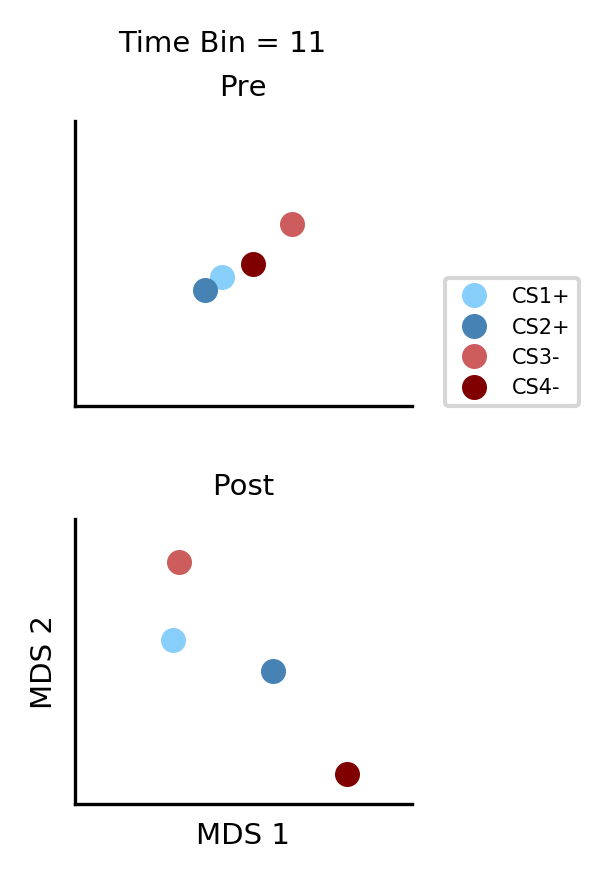

In [102]:
fig, axs = pl.subplots(2, 1, figsize=(1.7, 3), sharex=True, sharey=True)
which_run = 0
t = 11

#plot_mds(axs[0], np.mean(eval("patterns_tb_%s_pre_all_mds"%t),axis=0), labels_comb, symbol1='o',symbol2='o')
plot_mds(axs[0], eval("patterns_tb_%s_pre_all_mds[which_run]"%t), labels_comb, symbol1='o',symbol2='o')
axs[0].set_title('Pre')
#plot_mds(axs[1], np.mean(eval("patterns_tb_%s_post_all_mds"%t),axis=0), labels_comb, symbol1='o',symbol2='o')
plot_mds(axs[1], eval("patterns_tb_%s_post_all_mds[which_run]"%t), labels_comb, symbol1='o',symbol2='o')
axs[1].set_title('Post')

axs[0].legend(['CS1+', 'CS2+', 'CS3-', 'CS4-'],
                 fontsize=5, loc=(1.1, 0))

pl.suptitle("Time Bin = "+str(t),fontsize=7)
lim = 15
for ax in axs.flatten():
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)

ax.set_xlabel('MDS 1')
ax.set_ylabel('MDS 2')

fig.tight_layout(pad=3)

#fig.savefig('../img/%s__mds_all4_tr.pdf'%NOTEBOOK_NAME, bbox='tight')

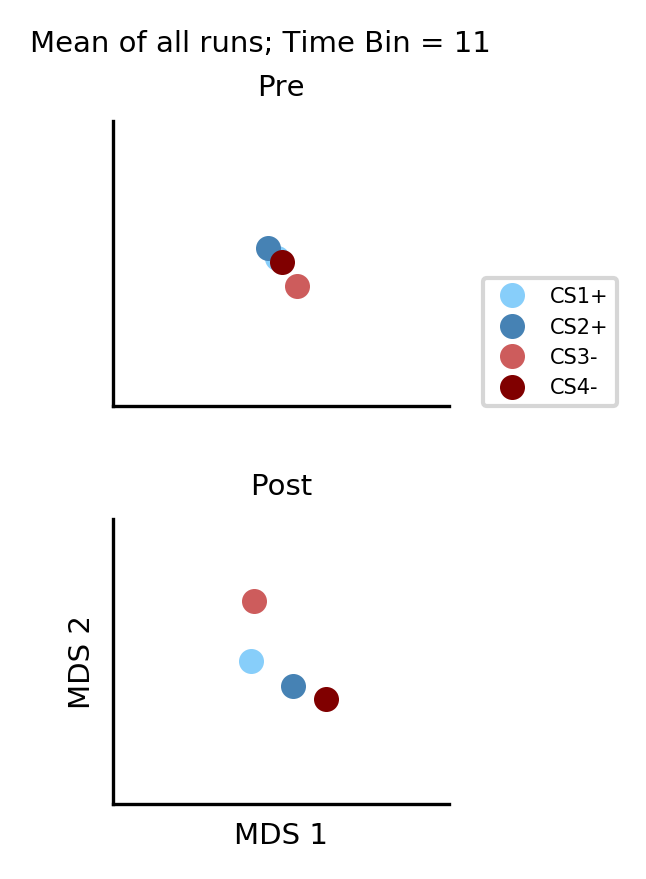

In [104]:
fig, axs = pl.subplots(2, 1, figsize=(1.7, 3), sharex=True, sharey=True)
t = 11

#plot_mds(axs[0], np.mean(eval("patterns_tb_%s_pre_all_mds"%t),axis=0), labels_comb, symbol1='o',symbol2='o')
plot_mds(axs[0], eval("patterns_tb_%s_pre_all_mds_mean"%t), labels_comb, symbol1='o',symbol2='o')
axs[0].set_title('Pre')
#plot_mds(axs[1], np.mean(eval("patterns_tb_%s_post_all_mds"%t),axis=0), labels_comb, symbol1='o',symbol2='o')
plot_mds(axs[1], eval("patterns_tb_%s_post_all_mds_mean"%t), labels_comb, symbol1='o',symbol2='o')
axs[1].set_title('Post')

axs[0].legend(['CS1+', 'CS2+', 'CS3-', 'CS4-'],
                 fontsize=5, loc=(1.1, 0))

pl.suptitle("Mean of all runs; Time Bin = "+str(t),fontsize=7)
lim = 2
for ax in axs.flatten():
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)

ax.set_xlabel('MDS 1')
ax.set_ylabel('MDS 2')

fig.tight_layout(pad=3)

#fig.savefig('../img/%s__mds_all4_tr.pdf'%NOTEBOOK_NAME, bbox='tight')

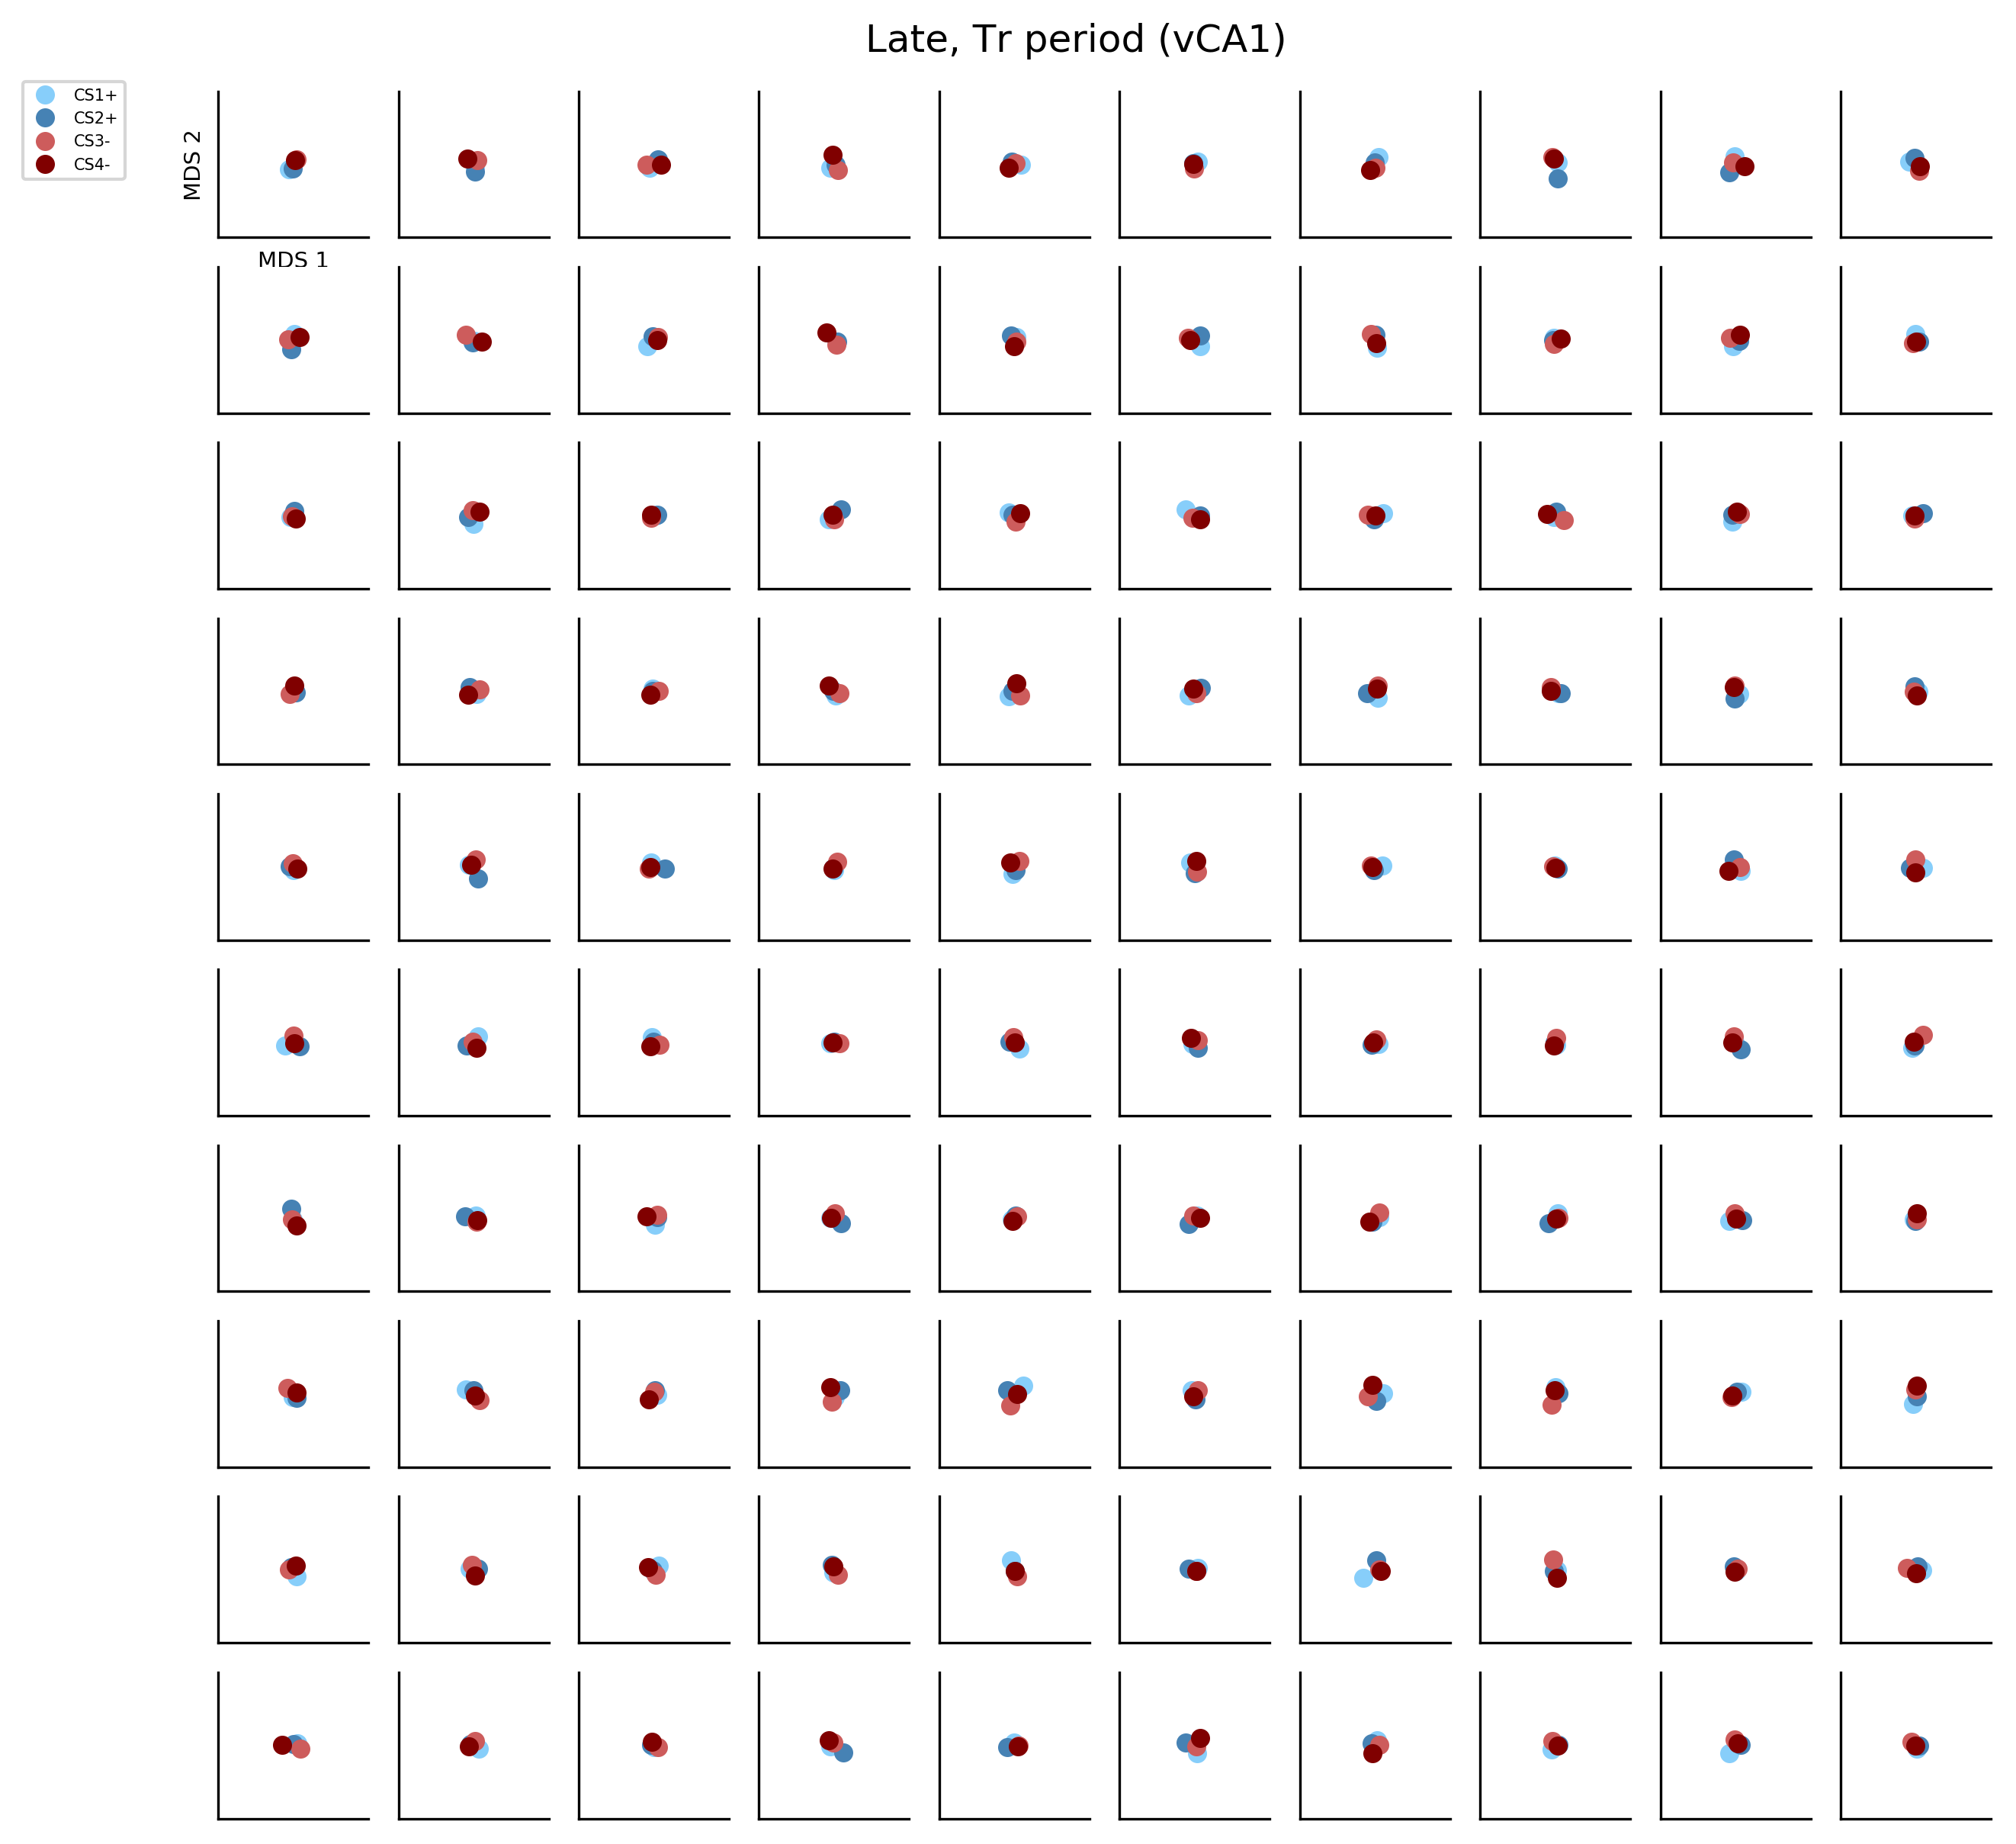

In [105]:
fig, axs = pl.subplots(10, 10, figsize=(10, 10), sharex=True, sharey=True)

for r in range(10):
    plot_mds(axs[0][r], patterns_tb_8_post_all_mds[r], labels_comb, symbol1='o',symbol2='o')
for r,c in zip(range(10,20),range(10)):
    plot_mds(axs[1][c], patterns_tb_8_post_all_mds[r], labels_comb, symbol1='o',symbol2='o')
for r,c in zip(range(20,30),range(10)):
    plot_mds(axs[2][c], patterns_tb_8_post_all_mds[r], labels_comb, symbol1='o',symbol2='o')    
for r,c in zip(range(30,40),range(10)):
    plot_mds(axs[3][c], patterns_tb_8_post_all_mds[r], labels_comb, symbol1='o',symbol2='o')   
for r,c in zip(range(40,50),range(10)):
    plot_mds(axs[4][c], patterns_tb_8_post_all_mds[r], labels_comb, symbol1='o',symbol2='o')
for r,c in zip(range(50,60),range(10)):
    plot_mds(axs[5][c], patterns_tb_8_post_all_mds[r], labels_comb, symbol1='o',symbol2='o')
for r,c in zip(range(60,70),range(10)):
    plot_mds(axs[6][c], patterns_tb_8_post_all_mds[r], labels_comb, symbol1='o',symbol2='o')
for r,c in zip(range(70,80),range(10)):
    plot_mds(axs[7][c], patterns_tb_8_post_all_mds[r], labels_comb, symbol1='o',symbol2='o') 
for r,c in zip(range(80,90),range(10)):
    plot_mds(axs[8][c], patterns_tb_8_post_all_mds[r], labels_comb, symbol1='o',symbol2='o')
for r,c in zip(range(90,100),range(10)):
    plot_mds(axs[9][c], patterns_tb_8_post_all_mds[r], labels_comb, symbol1='o',symbol2='o')
    
axs[0][0].legend(['CS1+', 'CS2+', 'CS3-', 'CS4-'],
                 fontsize=5, loc=(-1.3, 0.4))

lim = 50
for ax in axs.flatten():
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)

axs[0][0].set_xlabel('MDS 1')
axs[0][0].set_ylabel('MDS 2')
pl.suptitle("Late, Tr period (vCA1)",y=.91,fontsize=12)


#fig.savefig('../img/%s__mds_all_postVSrenew_CS.pdf'%NOTEBOOK_NAME, bbox='tight')

In [128]:
from mpl_toolkits.mplot3d import Axes3D

def plot_mds_3d(ax, postrenew_patterns_all_mds, labels_comb, with_background=False,
             symbol1='o', symbol2='^', colors=['lightskyblue','steelblue','indianred','maroon']):

    x = postrenew_patterns_all_mds[:, 0]
    y = postrenew_patterns_all_mds[:, 1]
    z = postrenew_patterns_all_mds[:, 2]

    #n_pre = postrenew_patterns_all_mds.shape[0]/2
    CS1x = [x[labels_comb==1].mean()]
    CS2x = [x[labels_comb==2].mean()]
    CS3x = [x[labels_comb==3].mean()]
    CS4x = [x[labels_comb==4].mean()]
    CS1y = [y[labels_comb==1].mean()]
    CS2y = [y[labels_comb==2].mean()]
    CS3y = [y[labels_comb==3].mean()]
    CS4y = [y[labels_comb==4].mean()]
    CS1z = [z[labels_comb==1].mean()]
    CS2z = [z[labels_comb==2].mean()]
    CS3z = [z[labels_comb==3].mean()]
    CS4z = [z[labels_comb==4].mean()]

    ax.plot(CS1x, CS1y, CS1z, symbol1, mew=1, ms=5, zorder=19, color = colors[0])
    ax.plot(CS2x, CS2y, CS2z, symbol1, mew=1, ms=5, zorder=19, color = colors[1])
    ax.plot(CS3x, CS3y, CS3z, symbol2, mew=1, ms=5, zorder=19, color = colors[2])
    ax.plot(CS4x, CS4y, CS4z, symbol2, mew=1, ms=5, zorder=19, color = colors[3])

    if with_background:
        ax.plot(x[labels_comb==1], y[labels_comb==1], z[labels_comb==1],
                symbol1, mew=0, ms=2, alpha=0.3, color=colors[0])
        ax.plot(x[labels_comb==2], y[labels_comb==2], z[labels_comb==2],
                symbol1, mew=0, ms=2, alpha=0.3, color=colors[1])
        ax.plot(x[labels_comb==3], y[labels_comb==3], z[labels_comb==3],
                symbol1, mew=0, ms=2, alpha=0.3, color=colors[2])
        ax.plot(x[labels_comb==4], y[labels_comb==4], z[labels_comb==4],
                symbol1, mew=0, ms=2, alpha=0.3, color=colors[3])
    lim = 4
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)
    #ax.set_zlim(-lim, lim)

    #ax.set_xticks(())
    #ax.set_yticks(())
    #ax.set_zticks(())

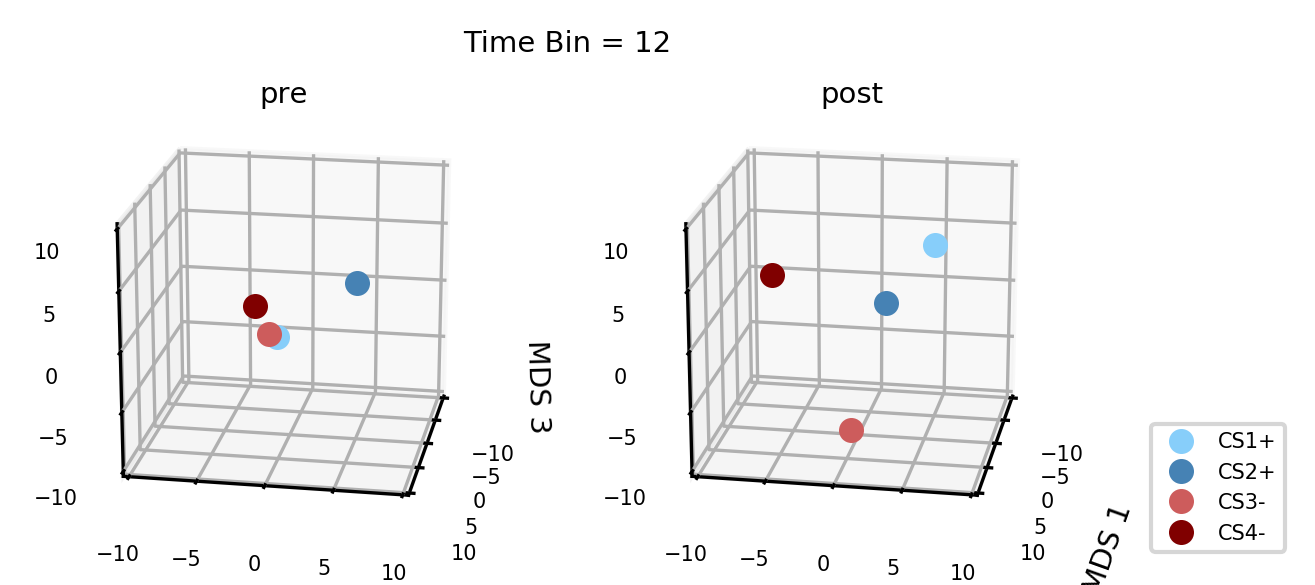

In [129]:
#fig, axs = pl.subplots(2, 1, figsize=(1.7, 3), sharex=True, sharey=True)
which_run = 0
t = 12
lim = 10

fig = pl.figure(figsize=(4, 2))

for i in range(2):
       
    ax = fig.add_subplot(1, 2, i+1, projection='3d')
    
    ax.view_init(azim=10, elev=20)

    plot_mds_3d(ax, eval("patterns_tb_%s_%s_all_mds_3d[which_run]"%(t,sessions[i])), labels_comb, symbol1='o',symbol2='o',
                with_background=False)
    ax.set_title(sessions[i])
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)
    ax.set_zlim(-lim, lim)

ax.legend(['CS1+', 'CS2+', 'CS3-', 'CS4-'],
                 fontsize=5, loc=(1.1, 0))

pl.suptitle("Time Bin = "+str(t),fontsize=7)

ax.set_xlabel('MDS 1')
ax.set_ylabel('MDS 2')
ax.set_zlabel('MDS 3')

fig.tight_layout(pad=3)

#fig.savefig('../img/%s__mds_all4_tr.pdf'%NOTEBOOK_NAME, bbox='tight')

## find euclidian distances between data points

In [106]:
from scipy.spatial import distance

def get_euclid_dist(prepost_patterns_all_mds, labels_comb):

    x = prepost_patterns_all_mds[:, 0]
    y = prepost_patterns_all_mds[:, 1]
    
    CS1x = [x[labels_comb==1].mean()]
    CS2x = [x[labels_comb==2].mean()]
    CS3x = [x[labels_comb==3].mean()]
    CS4x = [x[labels_comb==4].mean()]
    CS1y = [y[labels_comb==1].mean()]
    CS2y = [y[labels_comb==2].mean()]
    CS3y = [y[labels_comb==3].mean()]
    CS4y = [y[labels_comb==4].mean()]
    
    CS1 = (CS1x,CS1y)
    CS2 = (CS2x,CS2y) 
    CS3 = (CS3x,CS3y) 
    CS4 = (CS4x,CS4y)
    
    dist_CS1_CS2 = distance.euclidean(CS1,CS2)
    dist_CS1_CS3 = distance.euclidean(CS1,CS3)
    dist_CS1_CS4 = distance.euclidean(CS1,CS4)
    dist_CS2_CS3 = distance.euclidean(CS2,CS3)
    dist_CS2_CS4 = distance.euclidean(CS2,CS4)
    dist_CS3_CS4 = distance.euclidean(CS3,CS4)
    
    return dist_CS1_CS2, dist_CS1_CS3, dist_CS1_CS4, dist_CS2_CS3, dist_CS2_CS4, dist_CS3_CS4

In [107]:
for sess in sessions:
    for t in range(26):
        for comp in (['CS1','CS2'], ['CS1','CS3'],['CS1','CS4'], ['CS2','CS3'], ['CS2','CS4'], ['CS3','CS4']):
            exec("d_%s_tb_%s_%s = {}"%(sess,t,comp[0]+comp[1]))
        for w in range(len(eval("patterns_tb_%s_%s_all_mds"%(t,sess)))):
                exec("d_%s_tb_%s_CS1CS2[w], d_%s_tb_%s_CS1CS3[w], d_%s_tb_%s_CS1CS4[w], d_%s_tb_%s_CS2CS3[w], d_%s_tb_%s_CS2CS4[w], d_%s_tb_%s_CS3CS4[w] = \
                get_euclid_dist(patterns_tb_%s_%s_all_mds[w], labels_comb)"%(sess,t,sess,t,sess,t,sess,t,sess,t,sess,t,t,sess))

In [108]:
##get mean of loops
#for sess in sessions:
#    for t in range(5,13):
#        for comp in (['CS1','CS2'], ['CS1','CS3'],['CS1','CS4'], ['CS2','CS3'], ['CS2','CS4'], ['CS3','CS4']):
#            exec("d_%s_tb_%s_%s_mean = []"%(sess,t,comp[0]+comp[1]))
#            q=0
#            for x in range(n_loop):
#                q = eval("d_%s_tb_%s_%s[x]"%(sess,t,comp[0]+comp[1]))+q
#            exec("d_%s_tb_%s_%s_mean = q/n_loop"%(sess,t,comp[0]+comp[1]))
#        exec("d_%s_tb_%s_CSpvsCSm_mean = (d_%s_tb_%s_CS1CS3_mean + d_%s_tb_%s_CS1CS4_mean + d_%s_tb_%s_CS2CS3_mean + \
#              d_%s_tb_%s_CS2CS4_mean)/4"%(sess,t,sess,t,sess,t,sess,t,sess,t))

In [109]:
#get mean of loops
for sess in sessions:
    for t in range(26):
        for comp in (['CS1','CS2'], ['CS1','CS3'],['CS1','CS4'], ['CS2','CS3'], ['CS2','CS4'], ['CS3','CS4']):
            exec("d_%s_tb_%s_%s_mean = np.mean([d_%s_tb_%s_%s[x] for x in d_%s_tb_%s_%s])"%(sess,t,comp[0]+comp[1],
                                                                    sess,t,comp[0]+comp[1],sess,t,comp[0]+comp[1]))
            exec("d_%s_tb_%s_%s_std = np.std([d_%s_tb_%s_%s[x] for x in d_%s_tb_%s_%s])"%(sess,t,comp[0]+comp[1],
                                                                    sess,t,comp[0]+comp[1],sess,t,comp[0]+comp[1]))
        exec("d_%s_tb_%s_CSpvsCSm_mean = np.mean([[d_%s_tb_%s_CS1CS3[x], d_%s_tb_%s_CS1CS4[x], d_%s_tb_%s_CS2CS3[x], \
              d_%s_tb_%s_CS2CS4[x]] for x in d_%s_tb_%s_CS1CS3])"%(sess,t,sess,t,sess,t,sess,t,sess,t,sess,t))
        exec("d_%s_tb_%s_CSpvsCSm_std = np.std([[d_%s_tb_%s_CS1CS3[x], d_%s_tb_%s_CS1CS4[x], d_%s_tb_%s_CS2CS3[x], \
              d_%s_tb_%s_CS2CS4[x]] for x in d_%s_tb_%s_CS1CS3])"%(sess,t,sess,t,sess,t,sess,t,sess,t,sess,t))

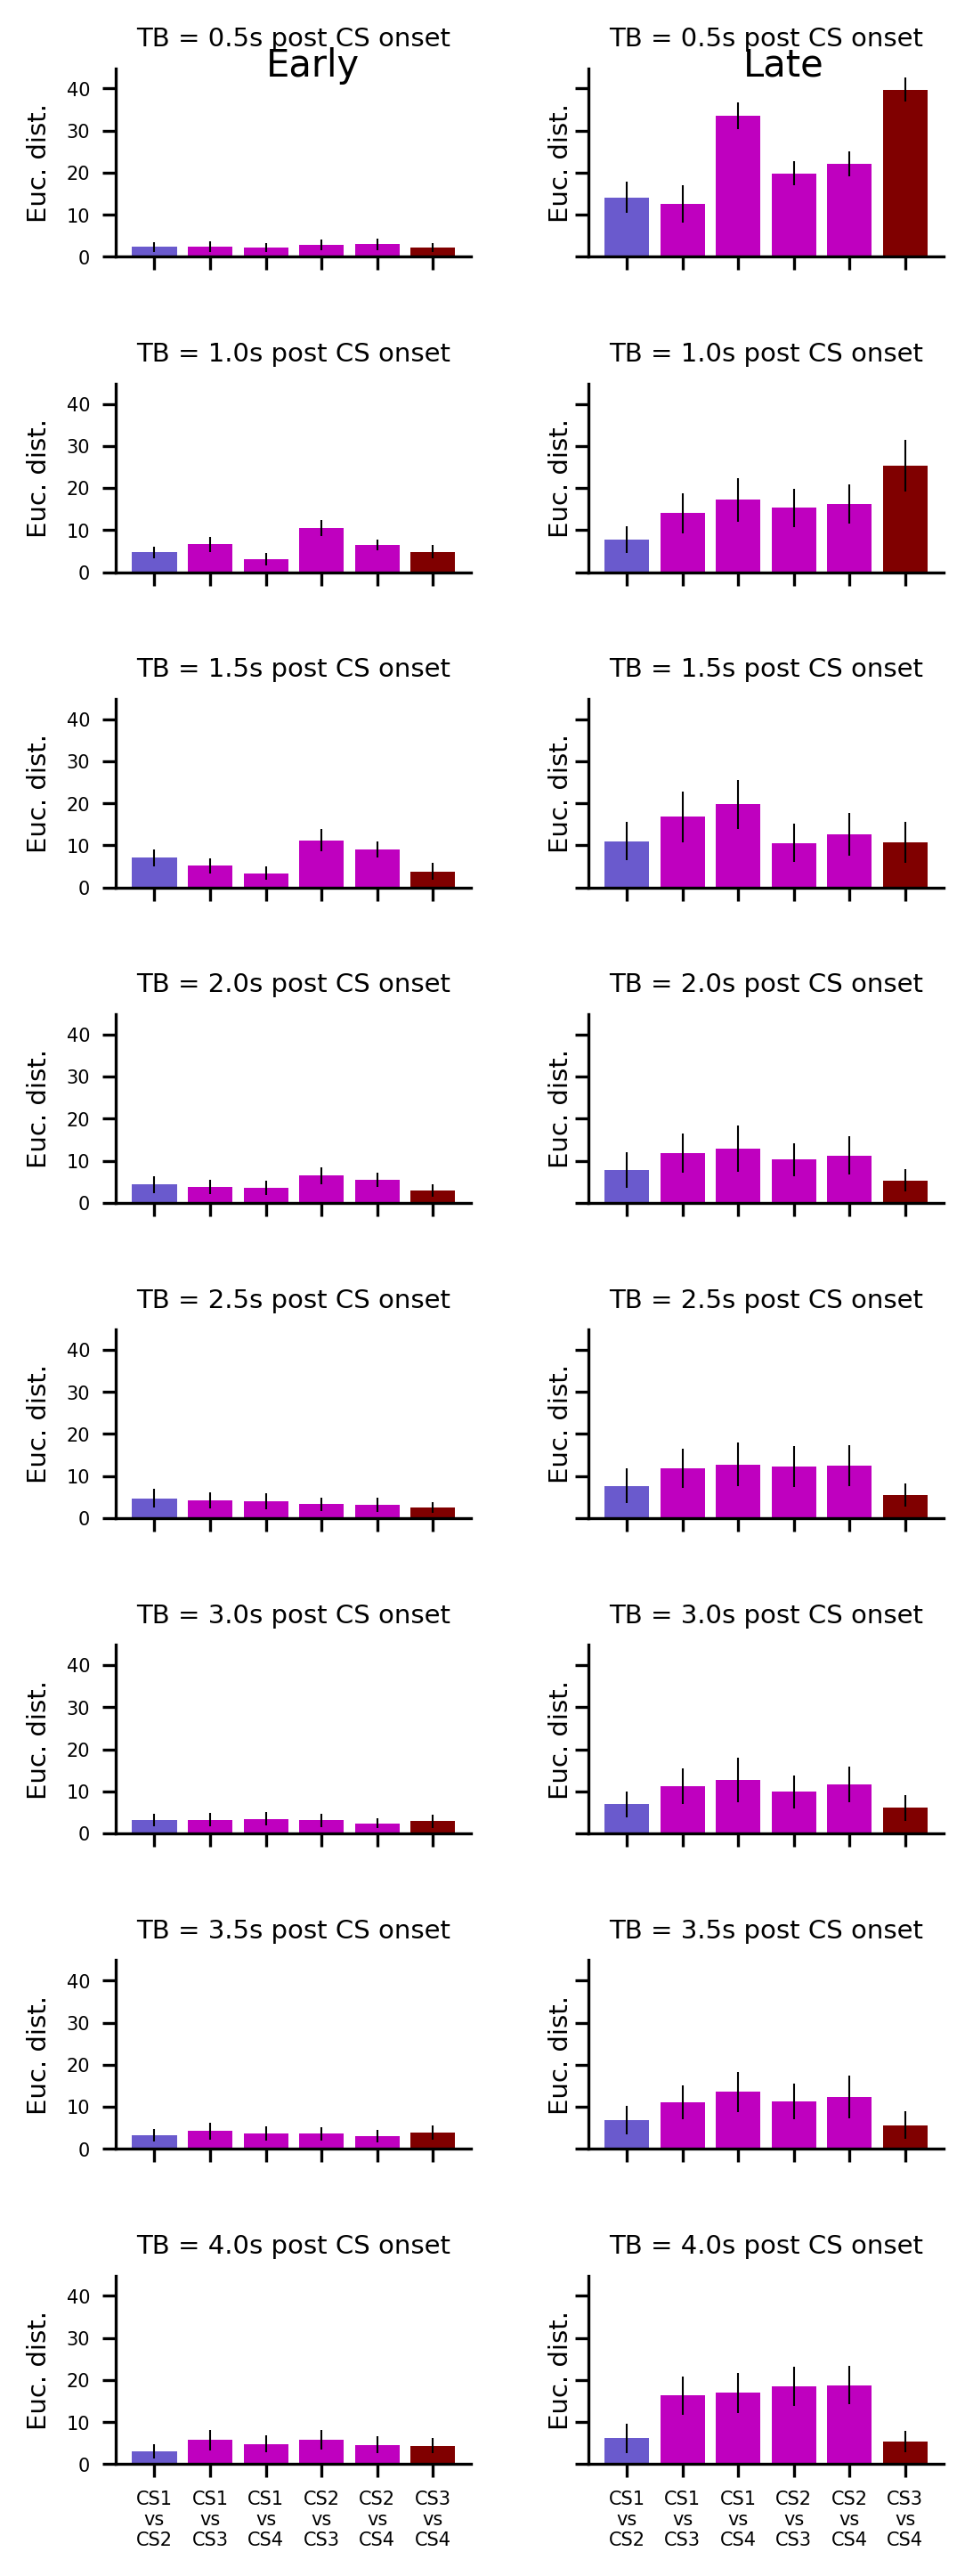

In [110]:
fig,ax = pl.subplots(len(range(10,18)),2,figsize=(4,10),sharex=True,sharey=True)
colors='slateblue','m','m','m','m','maroon'

for sess,r in zip(sessions,[0,1]):
    for t,c in zip(range(10,18),range(len(range(10,18)))):
        for comp,f in zip((['CS1','CS2'], ['CS1','CS3'],['CS1','CS4'], ['CS2','CS3'], ['CS2','CS4'], ['CS3','CS4']),range(6)):
            ax[c][r].bar(f,eval("d_%s_tb_%s_%s_mean"%(sess,t,comp[0]+comp[1])),color=colors[f],yerr=eval("d_%s_tb_%s_%s_std"%(sess,t,comp[0]+comp[1])))
            

            ax[c][r].set_xticks(range(6))
            ax[c][r].set_xticklabels(['CS1\nvs\nCS2', 'CS1\nvs\nCS3','CS1\nvs\nCS4', 'CS2\nvs\nCS3', 'CS2\nvs\nCS4', 'CS3\nvs\nCS4'])
            ax[c][r].set_ylabel('Euc. dist.')
            ax[c][r].set_title('TB = '+str(t/2.0-4.5)+'s post CS onset')
fig.tight_layout(pad=4)
ax[0][0].text(2,43,'Early',fontsize=10)
ax[0][1].text(2.1,43,'Late',fontsize=10)
        

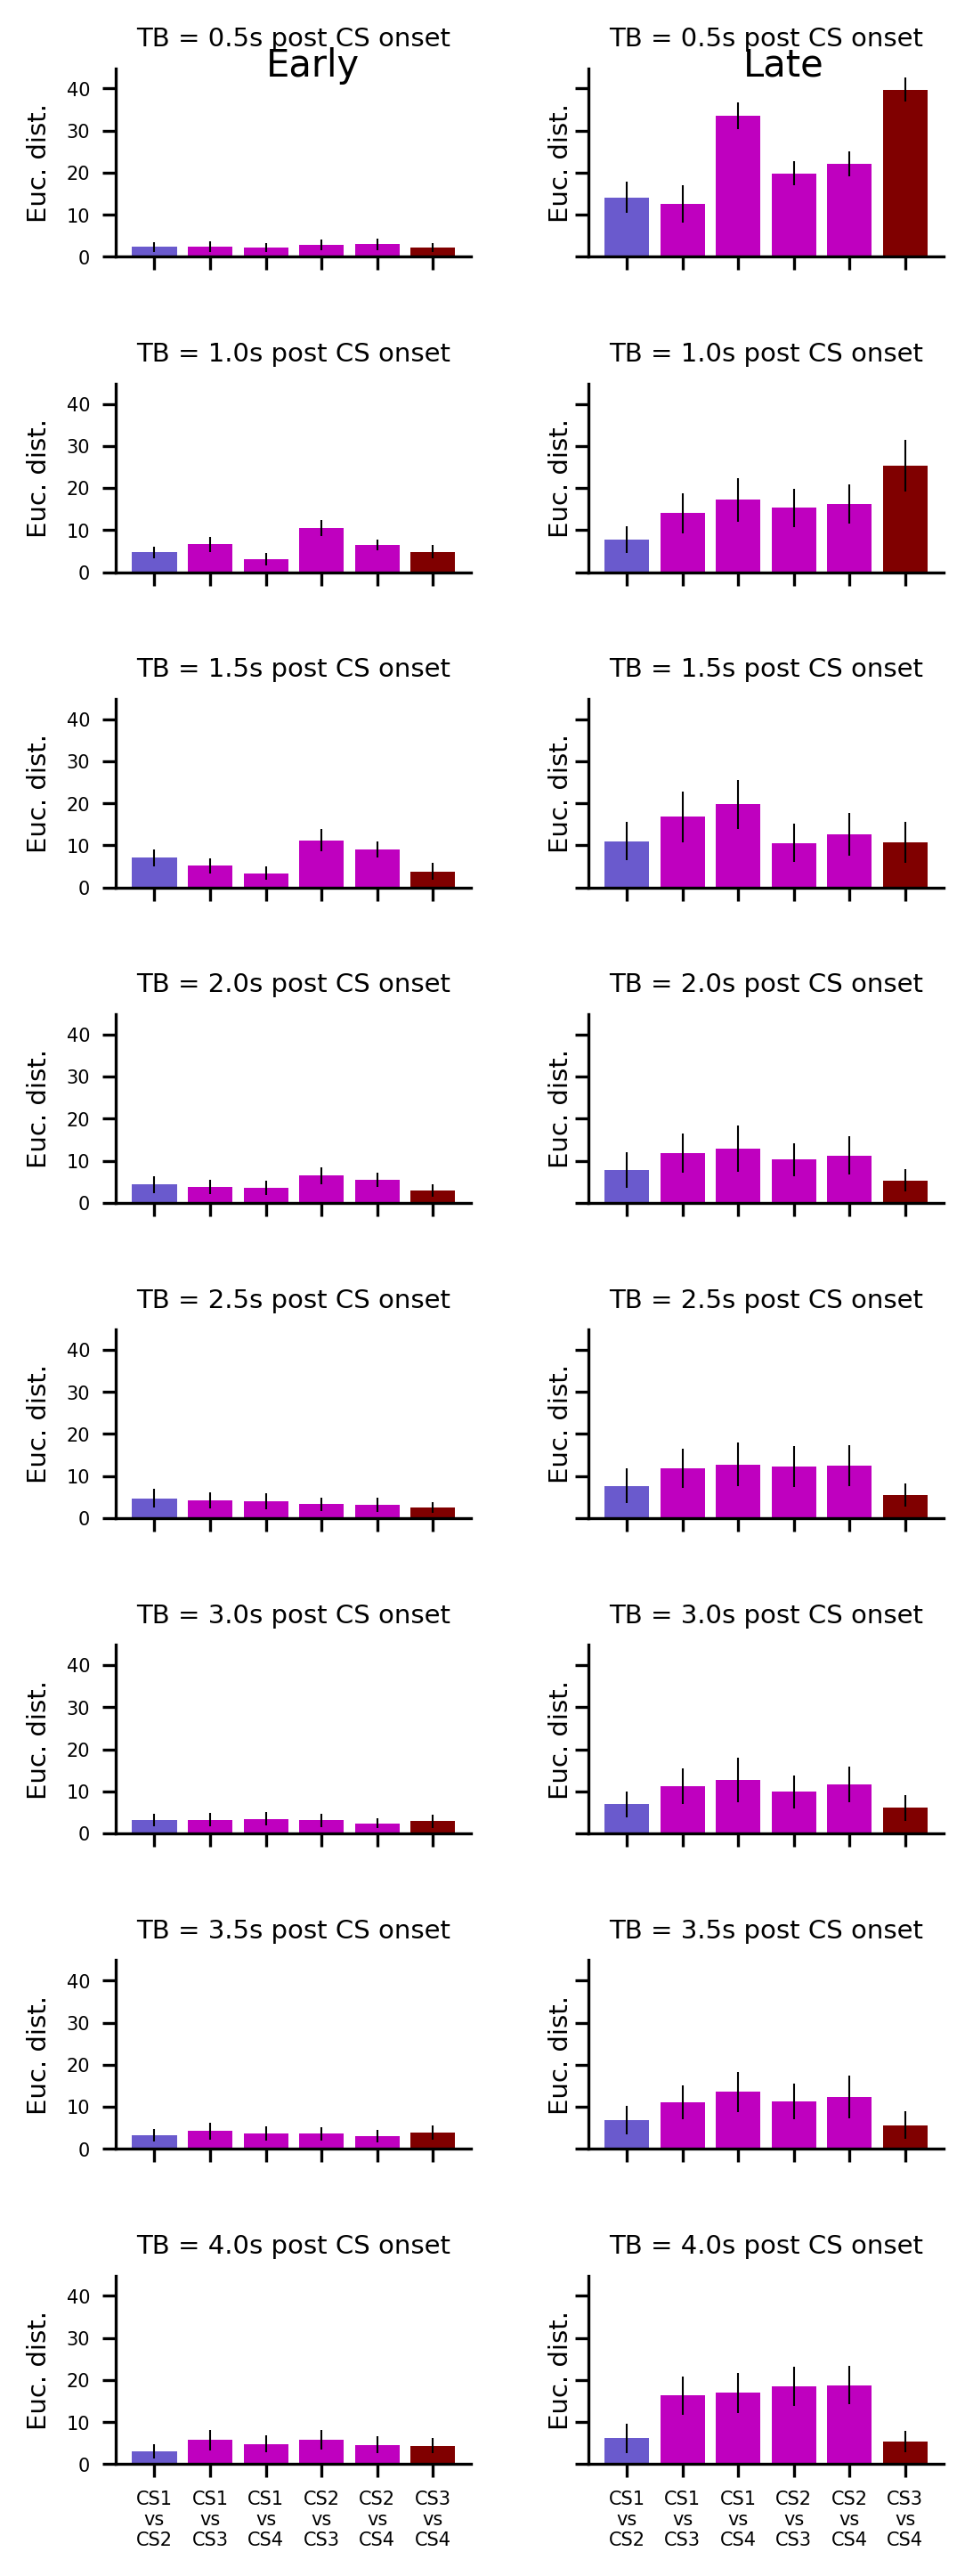

In [111]:
fig,ax = pl.subplots(len(range(10,18)),2,figsize=(4,10),sharex=True,sharey=True)
colors='slateblue','m','m','m','m','maroon'

for sess,r in zip(sessions,[0,1]):
    for t,c in zip(range(10,18),range(len(range(10,18)))):
        for comp,f in zip((['CS1','CS2'], ['CS1','CS3'],['CS1','CS4'], ['CS2','CS3'], ['CS2','CS4'], ['CS3','CS4']),range(6)):
            ax[c][r].bar(f,eval("[np.mean([d_%s_tb_%s_%s[x] for x in d_%s_tb_%s_%s])]"%(sess,t,comp[0]+comp[1],sess,t,comp[0]+comp[1])),
                         yerr=eval("[np.std([d_%s_tb_%s_%s[x] for x in d_%s_tb_%s_%s])]"%(sess,t,comp[0]+comp[1],sess,t,comp[0]+comp[1])),
                         color=colors[f])
            

            ax[c][r].set_xticks(range(6))
            ax[c][r].set_xticklabels(['CS1\nvs\nCS2', 'CS1\nvs\nCS3','CS1\nvs\nCS4', 'CS2\nvs\nCS3', 'CS2\nvs\nCS4', 'CS3\nvs\nCS4'])
            ax[c][r].set_ylabel('Euc. dist.')
            ax[c][r].set_title('TB = '+str(t/2.0-4.5)+'s post CS onset')
fig.tight_layout(pad=4)
ax[0][0].text(2,43,'Early',fontsize=10)
ax[0][1].text(2.1,43,'Late',fontsize=10)
        

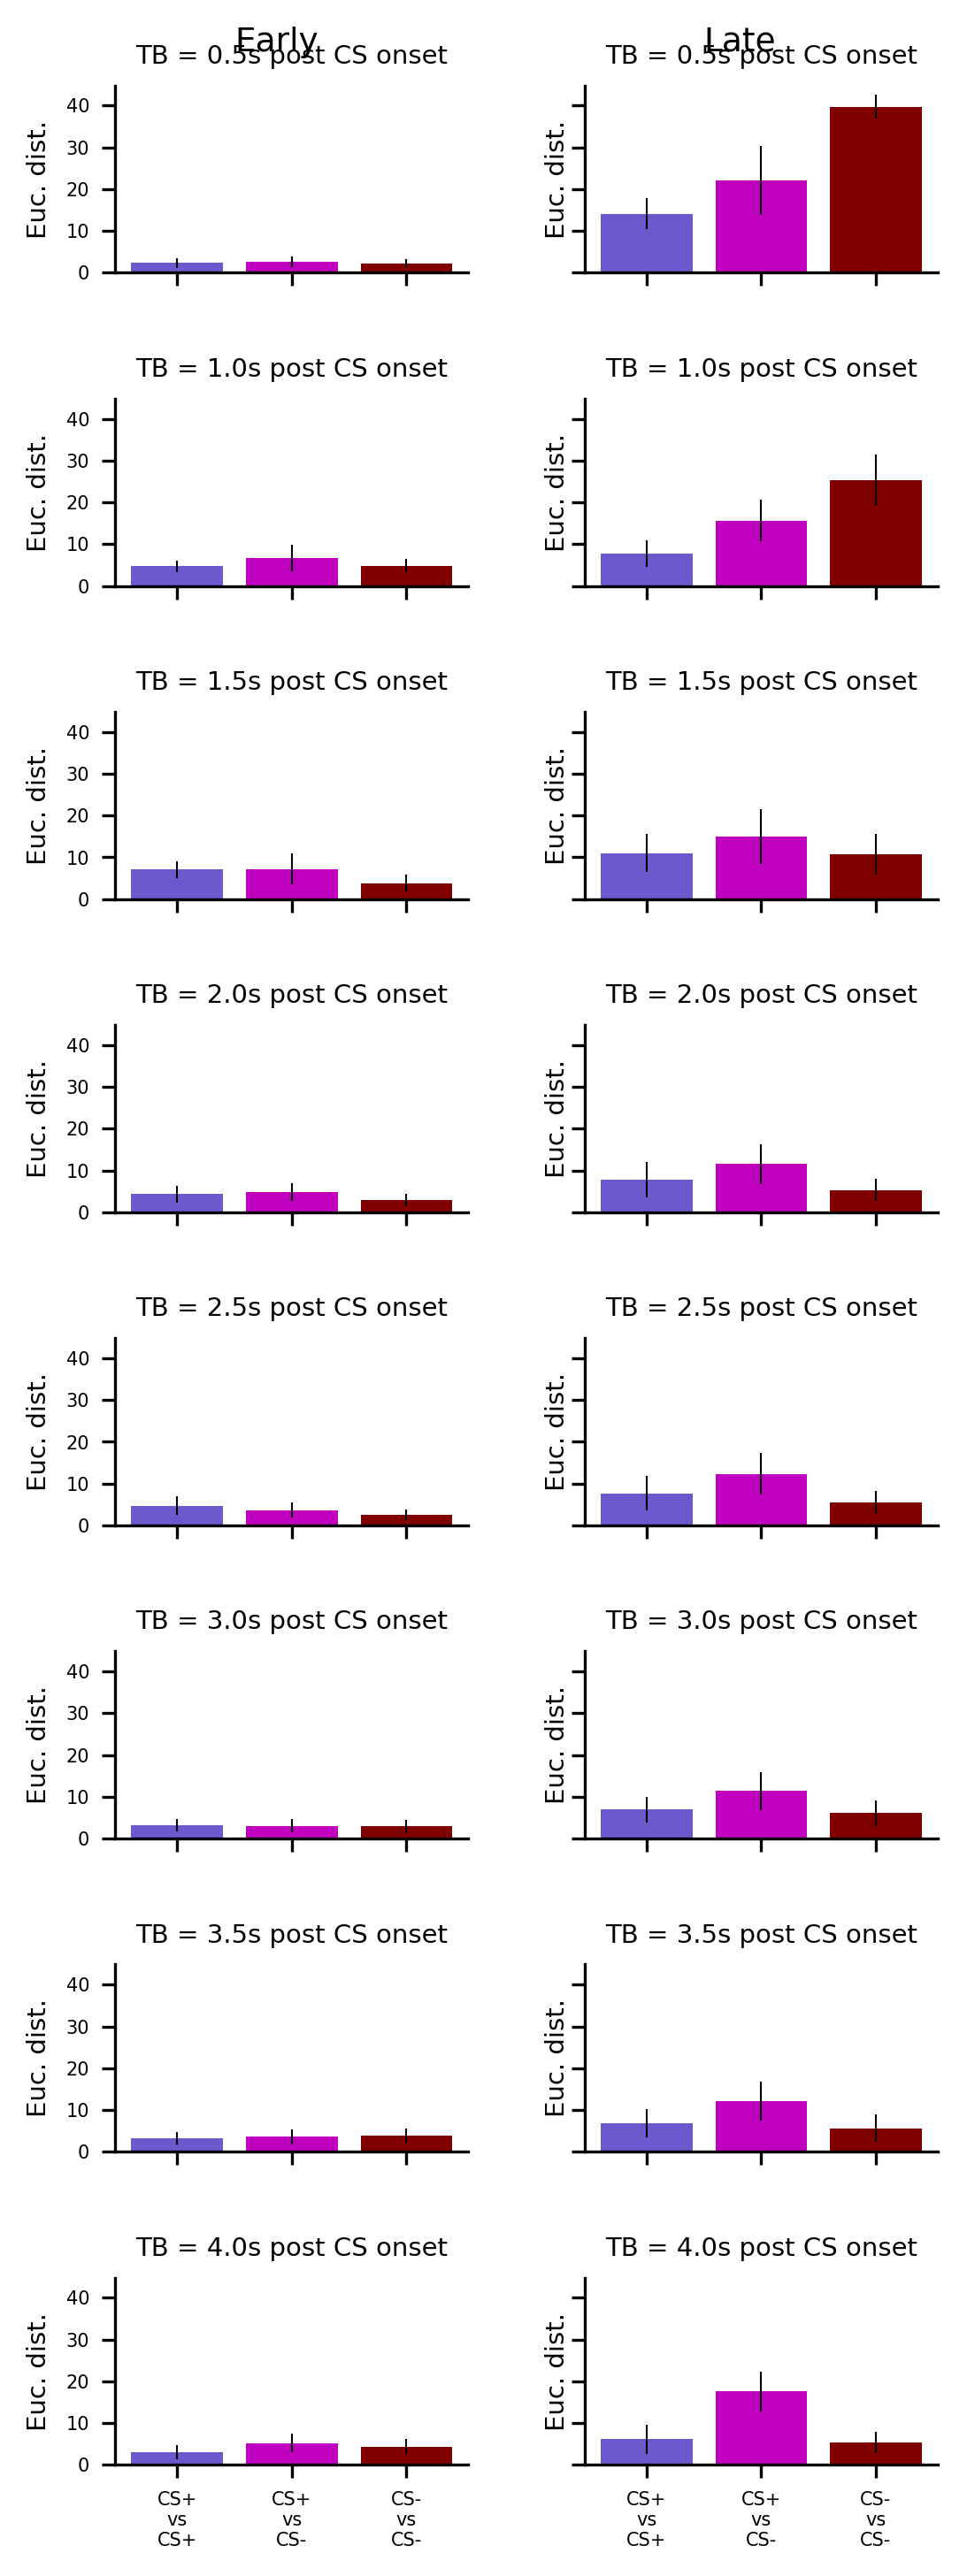

In [112]:
fig,ax = pl.subplots(len(range(10,18)),2,figsize=(4,10),sharex=True,sharey=True)
colors='slateblue','m','maroon'

for sess,r in zip(sessions,[0,1]):
    for t,c in zip(range(10,18),range(len(range(10,18)))):
        for comp,f in zip((['CS1','CS2'], ['CSpvs','CSm'], ['CS3','CS4']),range(3)):
            ax[c][r].bar(f,eval("d_%s_tb_%s_%s_mean"%(sess,t,comp[0]+comp[1])),color=colors[f],yerr=eval("d_%s_tb_%s_%s_std"%(sess,t,comp[0]+comp[1])))
            

            ax[c][r].set_xticks(range(3))
            ax[c][r].set_xticklabels(['CS+\nvs\nCS+', 'CS+\nvs\nCS-', 'CS-\nvs\nCS-'])
            ax[c][r].set_ylabel('Euc. dist.')
            ax[c][r].set_title('TB = '+str(t/2.0-4.5)+'s post CS onset')
fig.tight_layout(pad=4)
ax[0][0].text(.5,53,'Early',fontsize=9)
ax[0][1].text(.5,53,'Late',fontsize=9)
        

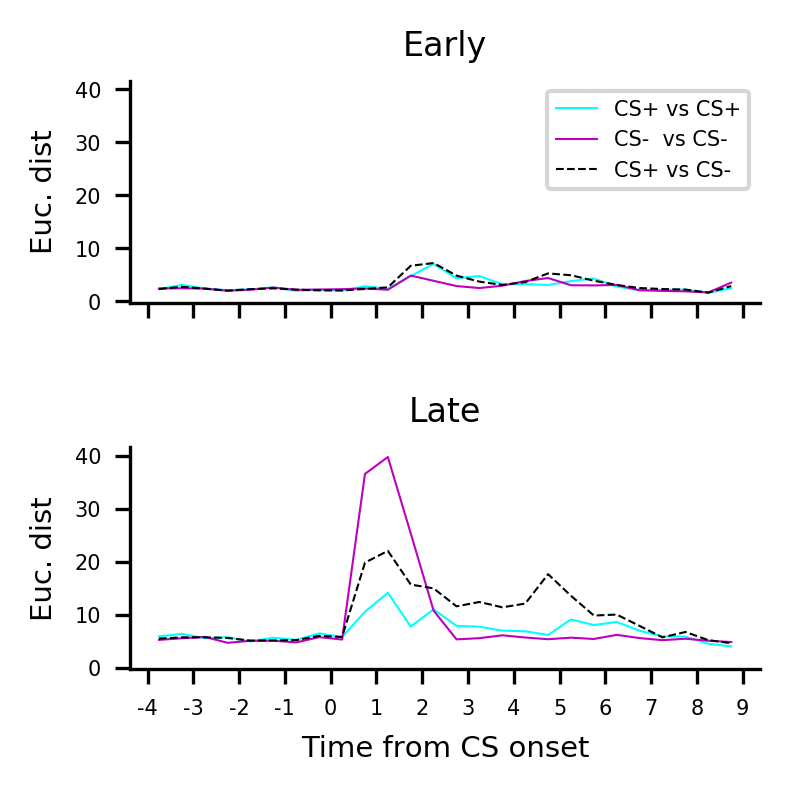

In [138]:
colors='cyan','m','k'
listy='-','-','--'
tb=range(26)

fig,ax = pl.subplots(2,1,figsize=(3,3),sharex=True,sharey=True)

for sess,r in zip(sessions,[0,1]):
    for comp,f,comp_la in zip((['CS1','CS2'], ['CS3','CS4'],['CSpvs','CSm']),range(3),('CS+ vs CS+','CS-  vs CS-','CS+ vs CS-')):
        ax[r].plot([(t+.5) for t in tb],[eval("d_%s_tb_%s_%s_mean"%(sess,t,comp[0]+comp[1])) for t in tb],color=colors[f],
                   linestyle=listy[f], label=comp_la)

ax[0].legend()
ax[0].set_title('Early',fontsize=8)
ax[1].set_title('Late',fontsize=8)
ax[0].set_ylabel('Euc. dist')
ax[1].set_ylabel('Euc. dist')
#ax[0].set_xlabel('Time from CS onset')
ax[1].set_xlabel('Time from CS onset')
tick_labels = range(-4,10)
ticks = range(0,len(tb)+1,2)
ax[1].set_xticks(ticks)
ax[1].set_xticklabels(tick_labels)
    #for t,c in zip(range(5,13),range(len(range(5,13)))):
    #    for comp,f in zip((['CS1','CS2'], ['CSpvs','CSm'], ['CS3','CS4']),range(3)):
    #        ax[c][r].bar(f,eval("d_%s_tb_%s_%s_mean"%(sess,t,comp[0]+comp[1])),color=colors[f],yerr=eval("d_%s_tb_%s_%s_std"%(sess,t,comp[0]+comp[1])))
            

    #        ax[c][r].set_xticks(range(3))
    #        ax[c][r].set_xticklabels(['CS+\nvs\nCS+', 'CS+\nvs\nCS-', 'CS-\nvs\nCS-'])
    #        ax[c][r].set_ylabel('Euc. dist.')
    #        ax[c][r].set_title('TB = '+str(t-5)+'s post CS onset')
fig.tight_layout(pad=4)

In [149]:
def plot_mds_trajectory(ax, labels_comb, session='post', tb = range(5,13), symbol1='o', symbol2='^',
                        CSp=True, CSm=True, colors=['firebrick','steelblue','firebrick','steelblue']):
    x={}
    y={}
    CS1x = {}
    CS2x = {}
    CS3x = {}
    CS4x = {}
    CS1y = {}
    CS2y = {}
    CS3y = {}
    CS4y = {}
    for t in tb:
        x[t] = eval("patterns_tb_%s_%s_all_mds_mean[:, 0]"%(t,session))
        y[t] = eval("patterns_tb_%s_%s_all_mds_mean[:, 1]"%(t,session))
        CS1x[t] = [x[t][labels_comb==1].mean()]
        CS2x[t] = [x[t][labels_comb==2].mean()]
        CS3x[t] = [x[t][labels_comb==3].mean()]
        CS4x[t] = [x[t][labels_comb==4].mean()]
        CS1y[t] = [y[t][labels_comb==1].mean()]
        CS2y[t] = [y[t][labels_comb==2].mean()]
        CS3y[t] = [y[t][labels_comb==3].mean()]
        CS4y[t] = [y[t][labels_comb==4].mean()]
    alpha_levels = np.linspace(.3,.9,len(tb))
    
    if CSp == True:
        ax.plot([CS1x[t] for t in tb], [CS1y[t] for t in tb], color = colors[0], zorder=1, alpha=.3, label='CS1+')
        ax.plot([CS2x[t] for t in tb], [CS2y[t] for t in tb], color = colors[1], zorder=1, alpha=.3, label='CS2+')
        for t,z in zip(tb,range(len(tb))):
            ax.plot(CS1x[t], CS1y[t], symbol1, mew=0, ms=2, color = colors[0], alpha=alpha_levels[z], zorder=2)
            ax.plot(CS2x[t], CS2y[t], symbol1, mew=0, ms=2, color = colors[1], alpha=alpha_levels[z], zorder=2)
    if CSm == True:
        ax.plot([CS3x[t] for t in tb], [CS3y[t] for t in tb],  linestyle='--', color = colors[2], zorder=1, alpha=.3, label='CS3-')
        ax.plot([CS4x[t] for t in tb], [CS4y[t] for t in tb],  linestyle='--', color = colors[3], zorder=1, alpha=.3, label='CS4-')
        for t,z in zip(tb,range(len(tb))):
            ax.plot(CS3x[t], CS3y[t], symbol2, mew=0, ms=2, color = colors[2], alpha=alpha_levels[z], zorder=2)
            ax.plot(CS4x[t], CS4y[t], symbol2, mew=0, ms=2, color = colors[3], alpha=alpha_levels[z], zorder=2)
                    
    lim = 4
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)

    ax.set_xticks(())
    ax.set_yticks(())

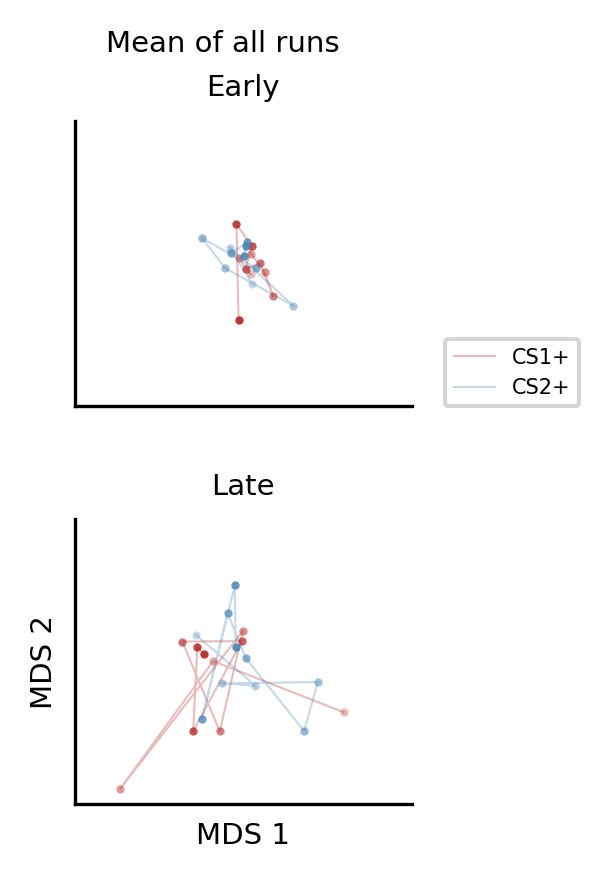

In [150]:
fig, axs = pl.subplots(2, 1, figsize=(1.7, 3), sharex=True, sharey=True)

plot_mds_trajectory(axs[0], labels_comb, session='pre', tb = range(10,20), symbol1='o',symbol2='^',CSm=False)
axs[0].set_title('Early')
plot_mds_trajectory(axs[1], labels_comb, session='post', tb = range(10,20), symbol1='o',symbol2='^',CSm=False)
axs[1].set_title('Late')

axs[0].legend(fontsize=5, loc=(1.1, 0))

pl.suptitle("Mean of all runs",fontsize=7)
lim = 2
for ax in axs.flatten():
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)

ax.set_xlabel('MDS 1')
ax.set_ylabel('MDS 2')

fig.tight_layout(pad=3)

#fig.savefig('../img/%s__mds_all4_tr.pdf'%NOTEBOOK_NAME, bbox='tight')

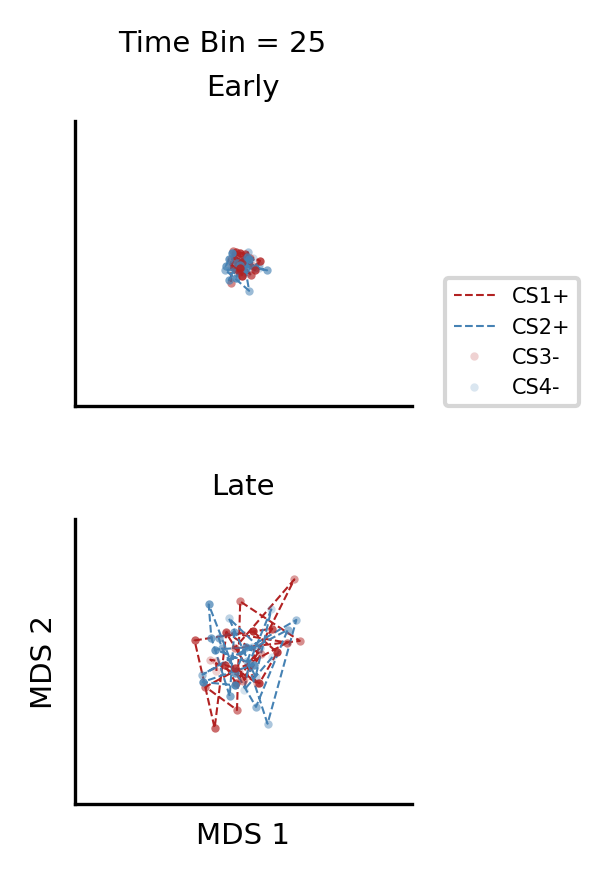

In [91]:
fig, axs = pl.subplots(2, 1, figsize=(1.7, 3), sharex=True, sharey=True)

plot_mds_trajectory(axs[0], labels_comb, session='pre', tb = range(26), which_run=1, symbol1='o',symbol2='o',CSp=False,mean=True)
axs[0].set_title('Early')
plot_mds_trajectory(axs[1], labels_comb, session='post', tb = range(26), which_run=1, symbol1='o',symbol2='o',CSp=False,mean=True)
axs[1].set_title('Late')

axs[0].legend(['CS1+', 'CS2+', 'CS3-', 'CS4-'],
                 fontsize=5, loc=(1.1, 0))

pl.suptitle("Time Bin = "+str(t),fontsize=7)
lim = 20
for ax in axs.flatten():
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)

ax.set_xlabel('MDS 1')
ax.set_ylabel('MDS 2')

fig.tight_layout(pad=3)

#fig.savefig('../img/%s__mds_all4_tr.pdf'%NOTEBOOK_NAME, bbox='tight')

In [208]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from functools import reduce

def plot_mds_trajectory_3d(ax, labels_comb, session='post', tb = range(5,13), symbol1='o', symbol2='^',cmap=pl.cm.gray_r,
                        CSp=True, CSm=True, colors=['firebrick','steelblue','firebrick','steelblue']):
    x={}
    y={}
    z={}
    CS1x = {}
    CS2x = {}
    CS3x = {}
    CS4x = {}
    CS1y = {}
    CS2y = {}
    CS3y = {}
    CS4y = {}
    CS1z = {}
    CS2z = {}
    CS3z = {}
    CS4z = {}
    for t in tb:
        x[t] = eval("patterns_tb_%s_%s_all_mds_3d_mean[:, 0]"%(t,session))
        y[t] = eval("patterns_tb_%s_%s_all_mds_3d_mean[:, 1]"%(t,session))
        z[t] = eval("patterns_tb_%s_%s_all_mds_3d_mean[:, 2]"%(t,session))
        CS1x[t] = [x[t][labels_comb==1].mean()]
        CS2x[t] = [x[t][labels_comb==2].mean()]
        CS3x[t] = [x[t][labels_comb==3].mean()]
        CS4x[t] = [x[t][labels_comb==4].mean()]
        CS1y[t] = [y[t][labels_comb==1].mean()]
        CS2y[t] = [y[t][labels_comb==2].mean()]
        CS3y[t] = [y[t][labels_comb==3].mean()]
        CS4y[t] = [y[t][labels_comb==4].mean()]
        CS1z[t] = [z[t][labels_comb==1].mean()]
        CS2z[t] = [z[t][labels_comb==2].mean()]
        CS3z[t] = [z[t][labels_comb==3].mean()]
        CS4z[t] = [z[t][labels_comb==4].mean()]
    
    Pl1x=[]
    Pl1y=[]
    Pl1z=[]
    Pl2x=[]
    Pl2y=[]
    Pl2z=[]
    Pl3x=[]
    Pl3y=[]
    Pl3z=[]
    Pl4x=[]
    Pl4y=[]
    Pl4z=[]
    for t in tb:
        Pl1x.append(CS1x[t])
        Pl1y.append(CS1y[t])
        Pl1z.append(CS1z[t])
        Pl2x.append(CS2x[t])
        Pl2y.append(CS2y[t])
        Pl2z.append(CS2z[t])
        Pl3x.append(CS3x[t])
        Pl3y.append(CS3y[t])
        Pl3z.append(CS3z[t])
        Pl4x.append(CS4x[t])
        Pl4y.append(CS4y[t])
        Pl4z.append(CS4z[t])
    Pl1x = reduce(lambda x,y: x+y,Pl1x)
    Pl1y = reduce(lambda x,y: x+y,Pl1y)
    Pl1z = reduce(lambda x,y: x+y,Pl1z)
    Pl2x = reduce(lambda x,y: x+y,Pl2x)
    Pl2y = reduce(lambda x,y: x+y,Pl2y)
    Pl2z = reduce(lambda x,y: x+y,Pl2z)
    Pl3x = reduce(lambda x,y: x+y,Pl3x)
    Pl3y = reduce(lambda x,y: x+y,Pl3y)
    Pl3z = reduce(lambda x,y: x+y,Pl3z)
    Pl4x = reduce(lambda x,y: x+y,Pl4x)
    Pl4y = reduce(lambda x,y: x+y,Pl4y)
    Pl4z = reduce(lambda x,y: x+y,Pl4z)
    
    alpha_levels = np.linspace(.2,.9,len(tb))
    if CSp == True:
        #ax.plot([CS1x[t] for t in tb], [CS1y[t] for t in tb], [CS1z[t] for t in tb], '-', color = colors[0], zorder=1,alpha=.4)
        #ax.plot([CS2x[t] for t in tb], [CS2y[t] for t in tb], [CS2z[t] for t in tb], '-', color = colors[1], zorder=1,alpha=.4)
        ax.plot(Pl1x-Pl1x[0],Pl1y-Pl1y[0],Pl1z-Pl1z[0],color = 'blue', alpha=.2, label='CS1+')
        ax.plot(Pl2x-Pl2x[0],Pl2y-Pl2y[0],Pl2z-Pl2z[0],color = 'red',  alpha=.2, label='CS2+')
        #for t,z in zip(tb,range(len(tb))):
        cmap = pl.cm.Blues
        colorz = cmap(np.linspace(0.2, 0.9,len(tb)))
        ax.scatter(Pl1x-Pl1x[0],Pl1y-Pl1y[0],Pl1z-Pl1z[0], symbol1, s=2, color = colorz, zorder=2)
        ax.plot([Pl1x[-1]-Pl1x[0]],[Pl1y[-1]-Pl1y[0]],[Pl1z[-1]-Pl1z[0]],
            'o', mew=1, mfc=(0, 0, 0, 0,), mec='blue', ms=5, lw=0.5)
        
        cmap = pl.cm.Reds
        colorz = cmap(np.linspace(0.1, 0.9,len(tb)))
        ax.scatter(Pl2x-Pl2x[0],Pl2y-Pl2y[0],Pl2z-Pl2z[0], symbol1, s=2, color = colorz, zorder=2)
        ax.plot([Pl2x[-1]-Pl2x[0]],[Pl2y[-1]-Pl2y[0]],[Pl2z[-1]-Pl2z[0]],
            'o', mew=1, mfc=(0, 0, 0, 0,), mec='red', ms=5, lw=0.5)      
        
        ax.plot([Pl1x[0]-Pl1x[0]],[Pl1y[0]-Pl1y[0]],[Pl1z[0]-Pl1z[0]],
            'o', mew=1, mfc=(0, 0, 0, 0,), mec='k', ms=5, lw=0.5)
    if CSm == True:
        #ax.plot([CS3x[t] for t in tb], [CS3y[t] for t in tb], [CS3z[t] for t in tb], '--', color = colors[2], zorder=1,alpha=.4)
        #ax.plot([CS4x[t] for t in tb], [CS4y[t] for t in tb], [CS4z[t] for t in tb], '--', color = colors[3], zorder=1,alpha=.4)
        ax.plot(Pl3x,Pl3y,Pl3z,color = colors[2], alpha=.3,linestyle='--', label='CS3-')
        ax.plot(Pl4x,Pl4y,Pl4z,color = colors[3], alpha=.3,linestyle='--', label='CS4-')
        for t,z in zip(tb,range(len(tb))):
            ax.plot(CS3x[t], CS3y[t], CS3z[t], symbol2, mew=0, ms=2, color = colors[2], alpha=alpha_levels[z], zorder=2)
            ax.plot(CS4x[t], CS4y[t], CS4z[t], symbol2, mew=0, ms=2, color = colors[3], alpha=alpha_levels[z], zorder=2)
                    
    lim = 4
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)
    ax.set_zlim(-lim, lim)

    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_zticks(())

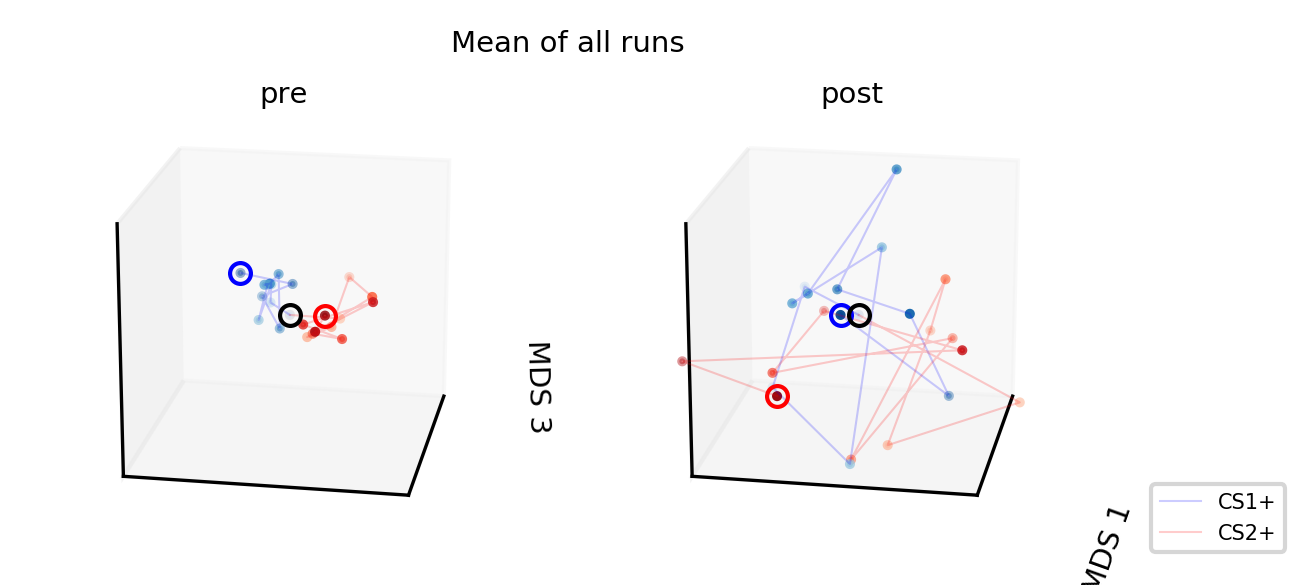

In [209]:
lim=1

fig = pl.figure(figsize=(4, 2))

for i in range(2):
       
    ax = fig.add_subplot(1, 2, i+1, projection='3d')
    
    ax.view_init(azim=10, elev=20)

    plot_mds_trajectory_3d(ax, labels_comb, session=sessions[i], tb=range(8,20), symbol1='o',symbol2='^',CSm=False)
    ax.set_title(sessions[i])
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)
    ax.set_zlim(-lim, lim)

ax.legend(fontsize=5, loc=(1.1, 0))

pl.suptitle("Mean of all runs",fontsize=7)

ax.set_xlabel('MDS 1')
ax.set_ylabel('MDS 2')
ax.set_zlabel('MDS 3')


fig.tight_layout(pad=3)

#fig.savefig('../img/%s__mds_all4_tr.pdf'%NOTEBOOK_NAME, bbox='tight')

In [ ]:
dist_prepost_CSm, dist_prepost_CSp,dist_prepost_CSpCSm, dist_prepost_CSmCSp, dist_prepre_CSpCSm, dist_postpost_CSpCSm = get_euclid_dist(prepost_patterns_all_mds[10], labels_comb[10])

In [ ]:
for x,y in zip(range(6),(dist_prepost_CSm, dist_prepost_CSp,dist_prepost_CSpCSm, dist_prepost_CSmCSp, dist_prepre_CSpCSm, dist_postpost_CSpCSm)):
    pl.bar(x,y)
pl.xticks(range(6),('prepost\nCS-', 'prepost\nCS+','prepost\nCS+CS-', 'prepost\nCS-CS+', 'prepre\nCS+CS-', 'postpost\nCS+CS-'))

In [210]:
save_workspace(db)

Could not store variable 'mpl'. Skipping...
Could not store variable 'distance'. Skipping...
Could not store variable 'di'. Skipping...
Could not store variable 'pt'. Skipping...
Could not store variable 'pl'. Skipping...
Could not store variable 'ip'. Skipping...
Could not store variable 'sys'. Skipping...
Could not store variable 'sstats'. Skipping...
Could not store variable 'ut'. Skipping...
Could not store variable 'time'. Skipping...
Could not store variable 'IPython'. Skipping...
Could not store variable 'pickle'. Skipping...
Could not store variable 'os'. Skipping...
Could not store variable 'np'. Skipping...
